# 4. Random Forest

### i. Explain the MTL strategy of loss combination in Q5(part III) be used with a Random Forest.

**In the MTL (Multi-Task Learning) strategy presented in our code, the loss combination is specific to neural networks and gradient-based optimization. Random Forest, being a tree-based model, does not have a direct way to combine losses from multiple tasks in the same manner as neural networks.**

**However, we can use an ensemble of Random Forest models, one for each task, and train them separately on their respective tasks. After training, we can combine their predictions in a weighted manner to make final predictions. The weights can be determined through cross-validation or by optimizing some performance metric on a validation set. Note that this approach is not MTL in the traditional sense, but rather an ensemble method that attempts to leverage the strengths of multiple models to improve the overall performance.**

### ii. Use the augmented dataset D1 train obtained in Q3(Part III) before to train a Random Forest for prediction of label and fit using label^2

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Read the augmented dataset
d1_train = pd.read_csv('d1_train_augmented.csv')
d1_val = pd.read_csv('d1_val_augmented.csv')

In [3]:
# Preprocessing the data for further use
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(d1_train['text'])
y_train = d1_train['disaster_label']

In [4]:
# Define the weights for the samples
sentiment_labels = d1_train['predicted_sentiment_label']
rp, rn, r0 = 1, 1, 1  # Assign appropriate values to rp, rn, and r0 based on your problem requirements
weights_train = np.where(sentiment_labels == 'positive', rp, np.where(sentiment_labels == 'negative', rn, r0))

In [5]:
# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train, sample_weight=weights_train)

RandomForestClassifier(random_state=42)

In [6]:
# Predict on the train dataset
y_pred = rf_model.predict(X_train)

In [7]:
# Evaluate the model
print("F1 Score on train:", f1_score(y_train, y_pred))
print("\nClassification Report:\n", classification_report(y_train, y_pred))

F1 Score on train: 0.9973384030418251

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3456
         1.0       1.00      1.00      1.00      2634

    accuracy                           1.00      6090
   macro avg       1.00      1.00      1.00      6090
weighted avg       1.00      1.00      1.00      6090



### Evaluate the Random Forest model on D1val and report the performance for T1.

In [8]:
# Transform the validation set text data using the previously fitted TF-IDF vectorizer
X_val_tfidf = tfidf_vectorizer.transform(d1_val['text'])


In [9]:
# Predict the labels for the validation set using the trained Random Forest model
y_val_pred = rf_model.predict(X_val_tfidf)
d1_val = d1_val.rename(columns={'disaster_label':'target'})


In [10]:
# Calculate the performance metrics
val_f1 = f1_score(d1_val['target'], y_val_pred)
val_confusion_matrix = confusion_matrix(d1_val['target'], y_val_pred)


In [11]:
# Print the performance metrics
print(f'Validation F1 Score: {val_f1}')



Validation F1 Score: 0.7020702070207021


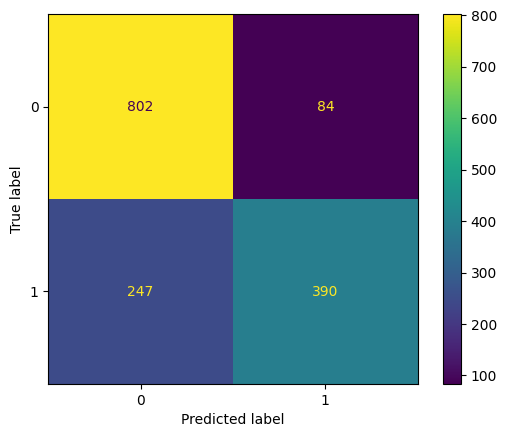

In [12]:
# Print the confusion matrix
cm_display = ConfusionMatrixDisplay(val_confusion_matrix, display_labels=["0", "1"])
cm_display.plot(values_format="d")